# CM50268 :: Final project (group work)

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 10, 2022. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This group exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


**Please submit your completed workbook using Moodle before 8pm on May 10, 2022 along with your individual report**. The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 and Task 6 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import hmc_Lab as hmc
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 

Undertake an initial exploratory analysis of the given data variables and summarise appropriately.
This need not be particularly extensive, but it should demonstrate that you have undertaken some
degree of \due diligence" with respect to the data set. In particular, you should focus on identifying
which of the input variables (if any) might be expected to be useful for predicting heating load, and
which might be irrelevant. You may also wish to comment on the apparent linearity, or otherwise,
of the problem.

As the final part of the exploratory analysis, establish a predictive \baseline" by fitting a linear
model to the training set by least-squares, and assessing its prediction accuracy on both train and
test sets.

This section of your report should include:

Initial observations as to the diculty of the task, its linearity etc.

Your comment on the likely relevance of the variables for predicting \Heating Load"

Appropriate graphs/charts as evidence to support the above

Detail of the accuracy of the least-squares linear model, on both train and test sets, in terms
of mean absolute error (MAE).

In [2]:
#### **** YOUR CODE HERE **** ####  
df_train = pd.read_csv('ee-train.csv')
df_test = pd.read_csv('ee-test.csv')

#### **** You can add extra cells to illustrate your results **** ####  

In [3]:
df_train.head()

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,1,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,1,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,1,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72


In [4]:
df_test.head()

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
1,1,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
2,1,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
3,1,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
4,1,0.86,588.0,294.0,147.00,7.0,4,0.0,0,19.34


In [5]:
df_train_corr = df_train.corr()

Text(69.0, 0.5, 'Variables')

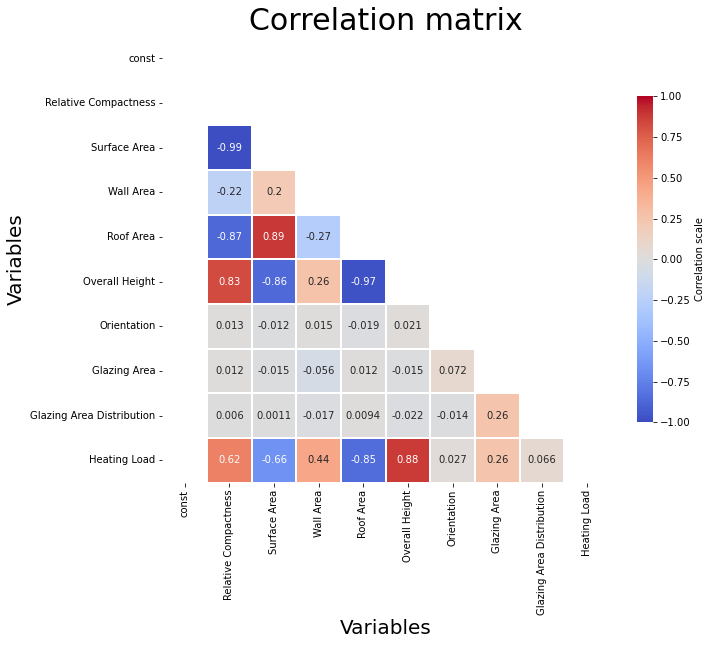

In [6]:
# sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_train_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Draw the heatmap with the mask and correct aspect ratio
corr_hm = sns.heatmap(df_train_corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.1,  cbar_kws={'label': 'Correlation scale', 'shrink': 0.4})

corr_hm.set_title('Correlation matrix', size=30)
corr_hm.set_xlabel('Variables', fontsize = 20)
corr_hm.set_ylabel('Variables', fontsize = 20)

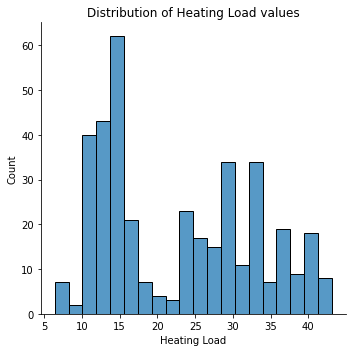

In [7]:
sns.displot(df_train['Heating Load'], kde=False, bins=20).set(xlabel='Heating Load', ylabel='Count')
plt.title('Distribution of Heating Load values')
plt.tight_layout()
plt.show()

In [8]:
ss = StandardScaler()

train_ss = pd.DataFrame(ss.fit_transform(df_train), columns=df_train.columns)
test_ss = pd.DataFrame(ss.transform(df_test), columns=df_test.columns)

train_ss2 = pd.DataFrame(df_train, columns=df_train.columns)
test_ss2 = pd.DataFrame(df_test, columns=df_train.columns)

train_ss['const'] = 1
test_ss['const'] = 1

X_train = train_ss.drop('Heating Load', axis=1).values

y_train = train_ss2['Heating Load'].values
y_train_ss = train_ss['Heating Load'].values

Y_train = y_train
X_test = test_ss.drop('Heating Load', axis=1).values

y_test = test_ss2['Heating Load'].values
y_test_ss = test_ss['Heating Load'].values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     544.8
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.72e-192
Time:                        21:04:19   Log-Likelihood:                -968.22
No. Observations:                 384   AIC:                             1952.
Df Residuals:                     376   BIC:                             1984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9207      0.155    147.581      0.000      22.615      23.226
x1            -7.2346      1.654     -4.373      0.000     -10.488      -3.982
x2            -3.9422      1.206     -3.269      0.001      -6.314      -1.571
x3             0.7560      0.312      2.420      0.016       0.142       1.370
x4            -4.2319      1.091     -3.880      0.000      -6.376      -2.087
x5             7.2040      0.858      8.401      0.000       5.518       8.890
x6            -0.1252      0.156     -0.803      0.423      -0.432       0.182
x7             2.7702      0.162     17.129      0.000       2.452       3.088
x8             0.2041      0.161      1.267      0.206      -0.113       0.521
==============================================================================
Omnibus:                        7.903   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               11.852
Skew:                           0.109   Prob(JB):                      0.00267
Kurtosis:                       3.832   Cond. No.                     1.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

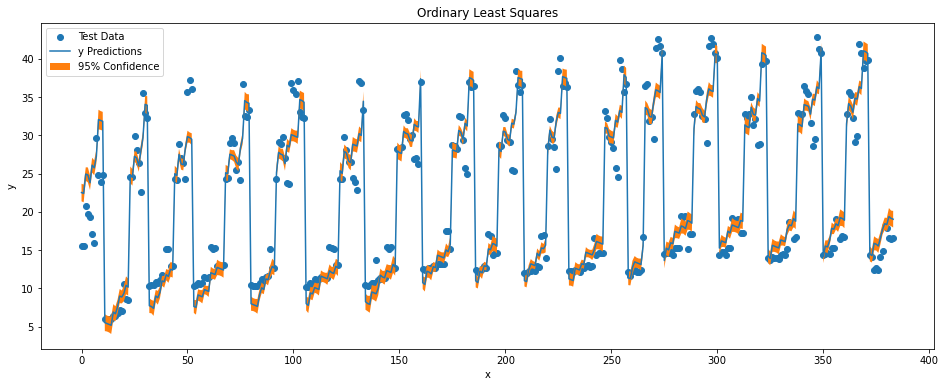

In [9]:
import statsmodels.api as sm
OLS_Regression = sm.OLS(y_train, X_train).fit()
y_pred_train = OLS_Regression.predict(X_train)
y_pred_test = OLS_Regression.predict(X_test)
cov = OLS_Regression.cov_params()
std_pred = np.sqrt(np.diag(X_test @ cov @ X_test.T))

"""Plots the predictions and test, with the confidence interval."""
plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred_test,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred_test)), 
                    y1=y_pred_test - 1.975 * std_pred, 
                    y2=y_pred_test + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Ordinary Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

OLS_Regression.summary()

In [10]:
print(f"MAE Train (blr): {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAE Test (blr): {mean_absolute_error(y_test, y_pred_test)}")
print(f"% of MAE Train (blr): {mean_absolute_percentage_error(y_train, y_pred_train)}")
print(f"% of MAE Test (blr): {mean_absolute_percentage_error(y_test, y_pred_test)}")

MAE Train (blr): 2.1306794414069166
MAE Test (blr): 2.069010093808354
% of MAE Train (blr): 0.09706328442508445
% of MAE Test (blr): 0.1033798654206991


In [11]:
# Check whether fixed variables are correctly defined ..
X_train = np.array(X_train)
y_train = np.array(y_train)

try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 (a) in the specification doc)

###  **(6 marks)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, slide 11 and 12 we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters (slide 12).


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [12]:
# Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    
    cov = 1/beta * np.identity(X.shape[0]) + np.matmul(1/alph * X, X.T)
    lgp = stats.multivariate_normal.logpdf(y, cov=cov, allow_singular=True)
    
    return lgp

Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms.

In [13]:
#### **** YOUR CODE HERE **** ####   
log_alph = np.linspace(-5, 0, 100)
log_beta = np.linspace(-5, 0, 100)
log_prob_y = np.zeros([100,100])

for i in range(100):
    for j in range(100):
        a = np.exp(log_alph[i])
        r = np.exp(log_beta[j])
        log_prob_y[i,j] = compute_log_marginal(X_train, y_train, a, r)
        
# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [14]:
#### **** YOUR CODE HERE **** ####
x, y = np.unravel_index(np.argmax(log_prob_y), log_prob_y.shape)
max_alph = np.exp(log_alph[x])
max_beta = np.exp(log_beta[y])
# max_alph = log_alph[x]
# max_beta = log_beta[y]
max_log = log_prob_y.max()

print('Most Probable Alpha =', max_alph)
print('Log alpha =', np.log(max_alph))
print('Most Probable Beta =', max_beta)
print('Log Beta =', np.log(max_beta))
print(f'Max Log Marginal Likelihood = {max_log}')

Most Probable Alpha = 0.01174362845702136
Log alpha = -4.444444444444445
Most Probable Beta = 0.10836802322189586
Log Beta = -2.2222222222222223
Max Log Marginal Likelihood = -1001.4576252255187


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

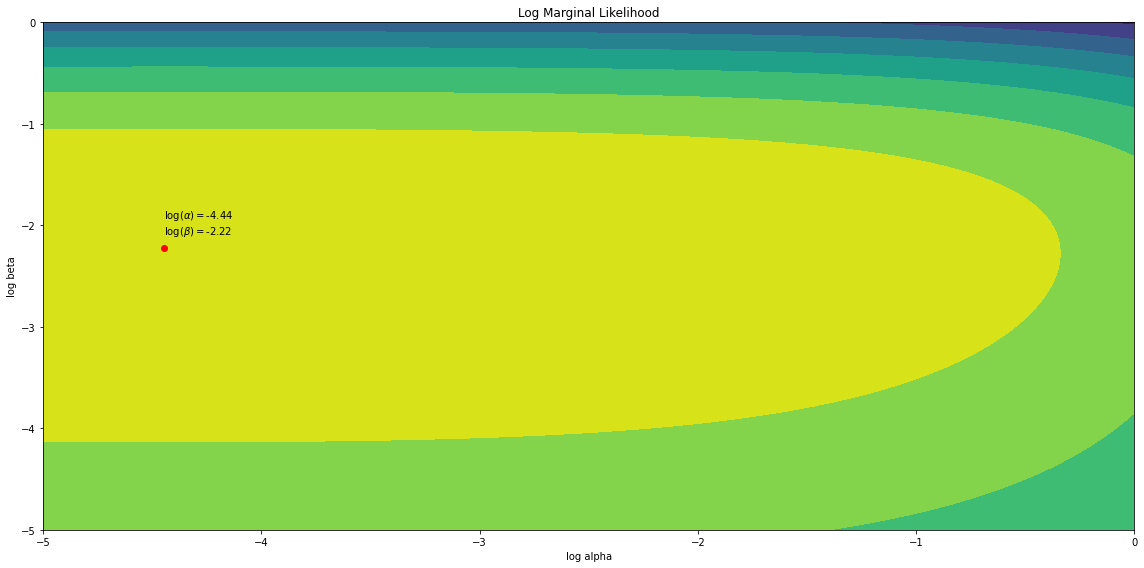

In [15]:
#### **** YOUR CODE HERE **** ####

plt.figure(figsize=(16, 8))
plt.contourf(log_alph, log_beta, log_prob_y.T)
#plt.plot(np.log10(max_alph), np.log10(max_beta), 'ro')
plt.plot(np.log(max_alph), np.log(max_beta), 'ro')
plt.annotate(r'log($\alpha)=$' + f'{np.log(max_alph):.2f}\n'+ r'log($\beta)=$' + 
             f'{np.log(max_beta):.2f}\n', (np.log(max_alph), np.log(max_beta)))
plt.xlabel('log alpha')
plt.ylabel('log beta')
plt.title('Log Marginal Likelihood')
plt.tight_layout()
plt.savefig('Log Marginal Likelihood.png')
plt.show()

Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [16]:
def compute_posterior(X, y, alph, beta):
    #
    Mu = np.linalg.inv(X.T @ X + beta*alph*np.identity(X.shape[1])) @ X.T @ y
    SIGMA = beta * np.linalg.inv(X.T @ X + beta*alph*np.identity(X.shape[1]))
    #
    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [17]:
#### **** YOUR CODE HERE **** ####

def predict(x_train, y_train, alph, beta, x_test):
    """Predict from the posterior."""
    w, mu = compute_posterior(x_train, y_train, alph, beta)
    y_pred = np.matmul(x_test, w)
    return y_pred, mu

y_pred_train, _ = predict(X_train, y_train, max_alph, max_beta, X_train)
y_pred_test, mu = predict(X_train, y_train, max_alph, max_beta, X_test)

alph = max_alph
beta = max_beta
Mu, SIGMA = compute_posterior(X_train, y_train, np.exp(alph), np.exp(beta))

err_train = mean_squared_error(y_train, y_pred_train)
err_test = mean_squared_error(y_test, y_pred_test)

# print(f'Maximum Predicted Weights for Train is {y_pred_train.max()} and Test is {y_pred_test.max()}')
# print(f'Minimum Predicted Weights for Train is {y_pred_train.min()} and Test is {y_pred_test.min()}')
# print()
RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE for Training Sets is:', RMSE_train)
RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE for Test Sets is:', RMSE_test)
print()
print(f"MAE Train (blr): {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAE Test (blr): {mean_absolute_error(y_test, y_pred_test)}")
print(f"% of MAE Train (blr): {mean_absolute_percentage_error(y_train, y_pred_train)}")
print(f"% of MAE Test (blr): {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE for Training Sets is: 3.011551809679531
RMSE for Test Sets is: 2.843584066991447

MAE Train (blr): 2.130668537392241
MAE Test (blr): 2.0689837233886177
% of MAE Train (blr): 0.09706467901152944
% of MAE Test (blr): 0.1033814960172767


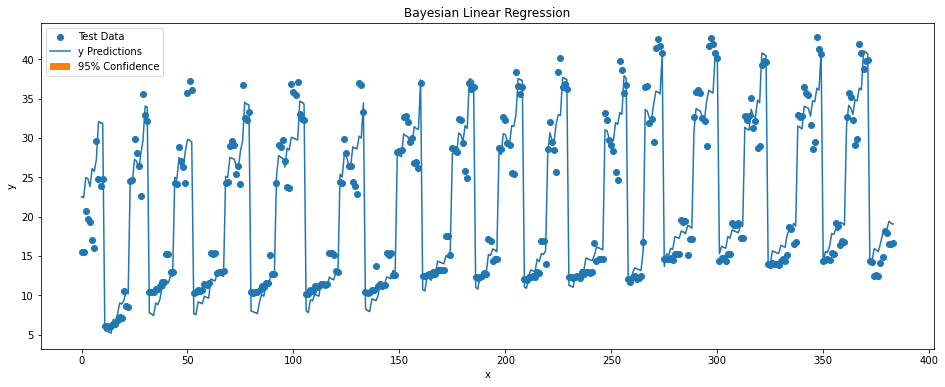

In [18]:
std_pred = np.sqrt(np.diag(X_test @ mu @ X_test.T))

plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred_test,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred_test)), 
                    y1=y_pred_test - 1.975 * std_pred, 
                    y2=y_pred_test + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Bayesian Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# Task 3: Variational Inference (Section 4.2 (b) in the specification doc)

###  **(4 marks)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

The corresponding derivations should be completed in your report.



In [19]:
def VI(X_train, y_train):
    """Variational Inference"""

    # Initialise...
    a0,b0,c0,d0 = 1e-3,1e-3,1e-3,1e-3
    alpha0 = a0/b0
    beta0 = c0/d0
    mu_n, sig_n = compute_posterior(X_train, y_train, alpha0, beta0)
    an = a0 + 9/2
    cn = c0 + 384/2
    bn,dn = b0,d0
    
    for i in range(len(X_train)):
        bn = b0 + 1/2*(mu_n.T @ mu_n + np.trace(sig_n))
        dn = d0 + 1/2*((y_train - X_train @ mu_n).T @ (y_train - X_train @ mu_n))
        alphaN, betaN = an/bn, cn/dn
        mu_n, sig_n = compute_posterior(X_train, y_train, alphaN, betaN)
    
    return an, bn, cn, dn, mu_n, sig_n

an, bn, cn, dn, mu_n, sig_n = VI(X_train, y_train)

Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 


In [20]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, Y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####

exp_alpha = an / bn
exp_beta = cn / dn

print(f"Expected alpha: {exp_alpha}")
print(f"Expected beta: {exp_beta}")
print(f"Expected log(alpha): {np.log(exp_alpha)}")
print(f"Expected log(beta): {np.log(exp_beta)}")
print(f"Best log probability: {compute_log_marginal(X_train, y_train, exp_alpha, exp_beta)}")

Expected alpha: 0.0119194030796849
Expected beta: 0.11026084947934511
Expected log(alpha): -4.4295876958064815
Expected log(beta): -2.2049063615210094
Best log probability: -1001.4975364847476


Text(0, 0.5, 'log beta')

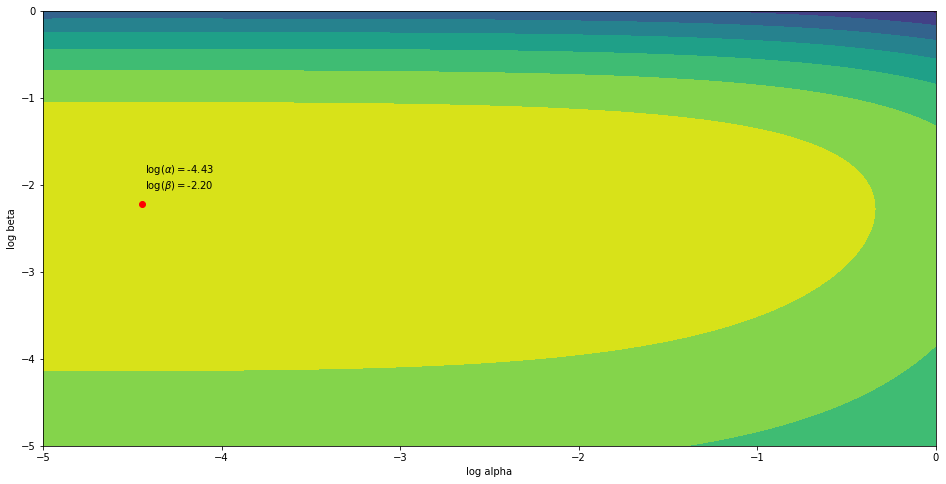

In [21]:
plt.figure(figsize=(16, 8))
plt.contourf(log_alph, log_beta, log_prob_y.T)
#plt.plot(np.log10(max_alph), np.log10(max_beta), 'ro')
plt.plot(np.log(max_alph), np.log(max_beta), 'ro')
plt.annotate(r'log($\alpha)=$' + f'{np.log(exp_alpha):.2f}\n'+ r'log($\beta)=$' + 
             f'{np.log(exp_beta):.2f}\n', (np.log(exp_alpha), np.log(exp_beta)))
plt.xlabel('log alpha')
plt.ylabel('log beta')

In [22]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [23]:
#### **** YOUR CODE HERE **** ####
rmse_train = sqrt(mean_squared_error(y_train, (X_train @ mu_n)))
rmse_test = sqrt(mean_squared_error(y_test, (X_test @ mu_n)))
mae_train = mean_absolute_error(y_train, (X_train @ mu_n))
mae_test = mean_absolute_error(y_test, (X_test @ mu_n))


print(f"Train RMSE (Variational Inference): {rmse_train}")
print(f"Test RMSE (Variational Inference): {rmse_test}")
print(f"Train MAE (Variational Inference): {mae_train}")
print(f"Test MAE (Variational Inference): {mae_test}")
print(f"% of MAE Train (Variational Inference): {mean_absolute_percentage_error(y_train, (X_train @ mu_n))}")
print(f"% of MAE Test (Variational Inference): {mean_absolute_percentage_error(y_test, (X_test @ mu_n))}")

Train RMSE (Variational Inference): 3.011551811142543
Test RMSE (Variational Inference): 2.8435839388218858
Train MAE (Variational Inference): 2.1306681809018593
Test MAE (Variational Inference): 2.06898286155992
% of MAE Train (Variational Inference): 0.09706472455713194
% of MAE Test (Variational Inference): 0.10338154927331399


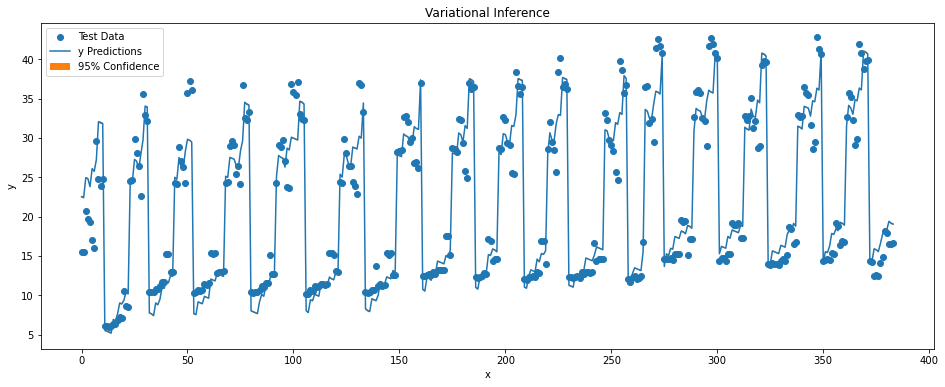

In [24]:
y_pred = X_test @ mu_n
std_pred = np.sqrt(np.diag(X_test @ sig_n @ X_test.T))


plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred)), 
                    y1=y_pred - 1.975 * std_pred, 
                    y2=y_pred + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Variational Inference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# Task 4: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [25]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    neglpg = np.negative(stats.multivariate_normal.logpdf(x, cov=covar))
    return neglpg

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    g = np.linalg.inv(covar) @ x
    return g

## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

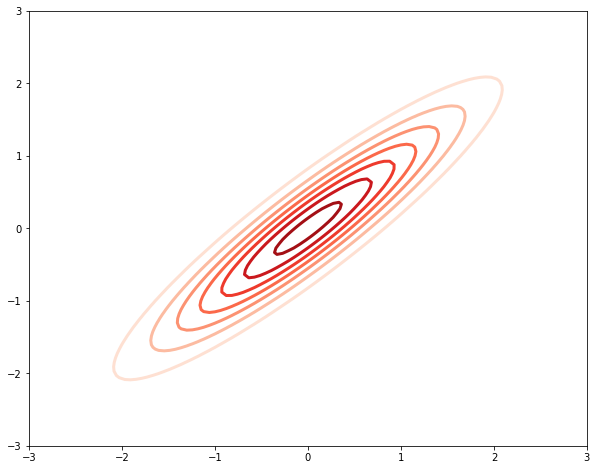

In [26]:
#### **** YOUR CODE BELOW **** ####

covar = np.array([[1.0875, 1],[1, 1.0875]])

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [27]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [28]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
       -4.85         -4.85   5.165912e-11  11
     5.83368       5.83368   5.420642e-10  11


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
       -4.85         -4.85   5.165912e-11  11
     5.83368       5.83368   5.420642e-10  11
|----------|  0% accepted [ 6 secs to go ]
|#---------| 91% accepted [ 5 secs to go ]
|##--------| 91% accepted [ 5 secs to go ]
|###-------| 90% accepted [ 4 secs to go ]
|####------| 90% accepted [ 3 secs to go ]
|#####-----| 90% accepted [ 3 secs to go ]
|######----| 90% accepted [ 2 secs to go ]
|#######---| 90% accepted [ 2 secs to go ]
|########--| 90% accepted [ 1 secs to go ]
|#########-| 90% accepted [ 1 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=5000 / L=100 / eps=0.36 / Accept=89.9%


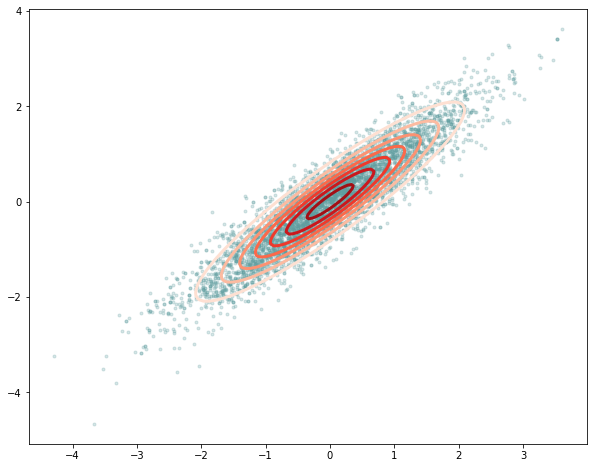

In [29]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####

R= 5000
L = 100
eps = 0.36
burn = int(R/10) 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

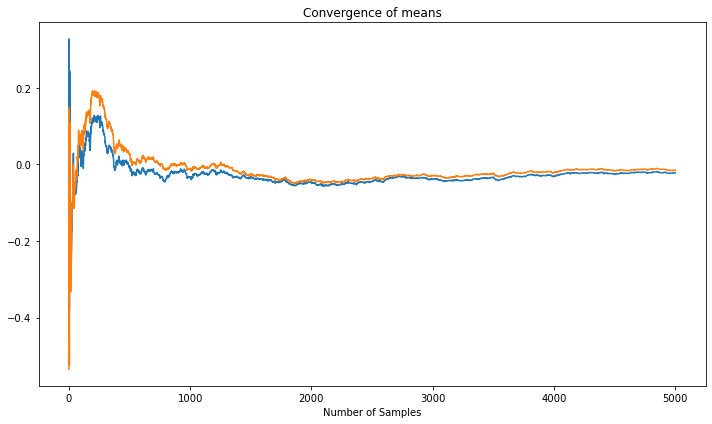

In [30]:
#### **** YOUR CODE HERE **** ####
S_mean = np.cumsum(S,axis=0)/(np.array(range(len(S)))+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(S_mean[:,0],label='Estimate for $\mu_1$')
plt.plot(S_mean[:,1],label='Estimate for $\mu_2$')

ax.set_xlabel('Number of Samples')
plt.title('Convergence of means')
plt.tight_layout()
#### **** You can add extra figures to support the individual report **** ####

# Task 5: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(8 marks)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [31]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    alpha = hps[0]
    beta = hps[1]
    w = hps[2:]
    
    N, M = x.shape
    
    a = (N / 2 * np.log(beta)) - (N / 2 * np.log(2*np.pi)) - beta / 2 * (np.sum((y - x @ w).T @ (y - x @ w)))
    b = (M / 2 * np.log(alpha)) - (M / 2 * np.log(2*np.pi)) - (alpha / 2) * (np.sum(w.T @ w))
    
    neglgp = - (a + b)
    
    return neglgp

In [32]:
def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    alpha = hps[0]
    beta = hps[1]
    w = hps[2:]
    
    N, M = x.shape
    
    grad_alpha = - (M / (2 * alpha)) + (np.sum(w.T @ w) / 2)
    grad_beta = - (N / (2 * beta)) + (np.sum(((y - x @ w).T @ (y - x @ w))) / 2)
    grad_w = - (alpha * w) + beta *  (y - x @ w) @ x
    
    g = np.array([grad_alpha, grad_beta] + list(grad_w))
    
    return g

In [33]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####

R = 20000
burn = int(R/10) 
L = 25
eps = 0.0003
initial_alpha = 0.1
initial_beta = 0.1

hps = np.array([initial_alpha, initial_beta] + list(mu_n))

#### you can adjust the hpyer-parameters. 


S, *_ = hmc.sample(hps, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, Y_train])

Calc.         Numeric       Delta         Acc.
     290.633       290.633   6.091057e-09  11
    -178.667      -178.667  -1.131675e-07  10
    -2.28905       2.28905   4.578100e+00   1
    0.722124     -0.722124  -1.444248e+00   1
    0.393429      -0.39343  -7.868590e-01   1
  -0.0755569     0.0755569   1.511138e-01   1
    0.422401     -0.422401  -8.448016e-01   1
   -0.719567      0.719567   1.439134e+00   1
   0.0125016    -0.0125016  -2.500319e-02   1
   -0.276659      0.276659   5.533183e-01   1
  -0.0203778     0.0203778   4.075561e-02   1
|----------|  0% accepted [ 18 secs to go ]
|#---------| 90% accepted [ 16 secs to go ]
|##--------| 90% accepted [ 14 secs to go ]
|###-------| 89% accepted [ 12 secs to go ]
|####------| 90% accepted [ 11 secs to go ]
|#####-----| 90% accepted [ 9 secs to go ]
|######----| 89% accepted [ 7 secs to go ]
|#######---| 89% accepted [ 5 secs to go ]
|########--| 89% accepted [ 4 secs to go ]
|#########-| 89% accepted [ 2 secs to go ]
|##########|

## Print out the RMSE and plot figures for your report

Expected Alpha: 0.01581116661459771
Expected Beta: 0.10837036092511947
Expected Bias = 0.2710521858981661


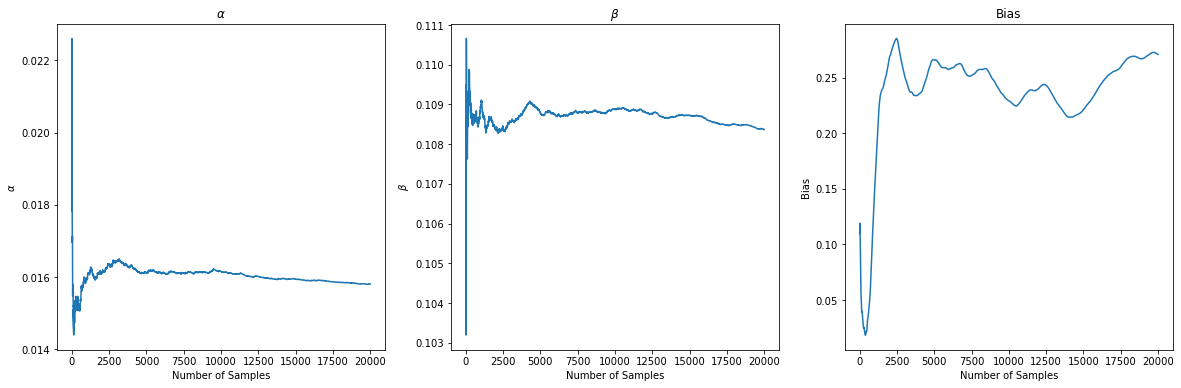

In [34]:
#### **** YOUR CODE HERE **** ####
S_mean = np.cumsum(S, axis=0) / (np.array(range(len(S))) + 1).reshape(-1,1)
fig, ax = plt.subplots(ncols=3, figsize=(20,6))
ax[0].plot(S_mean[:,0])
ax[0].set_xlabel('Number of Samples')
ax[0].set_ylabel(r'$\alpha$')
ax[0].set_title(r'$\alpha$')

ax[1].plot(S_mean[:,1])
ax[1].set_xlabel('Number of Samples')
ax[1].set_ylabel(r'$\beta$')
ax[1].set_title(r'$\beta$')

ax[2].plot(S_mean[:,-1])
ax[2].set_xlabel('Number of Samples')
ax[2].set_ylabel('Bias')
ax[2].set_title('Bias')

print(f"Expected Alpha: {S_mean[-1,0]}")
print(f"Expected Beta: {S_mean[-1,1]}")
print(f'Expected Bias = {S_mean[-1,-1]}')

RMSE Train (HMC): 3.0191159723456082
RMSE Test (HMC): 2.852596754726158
MAE Train (HMC): 2.161170589592424
MAE Test (HMC): 2.103963103943903
% of MAE Train (Variational Inference): 0.09807156021853908
% of MAE Test (Variational Inference): 0.10485563160458151


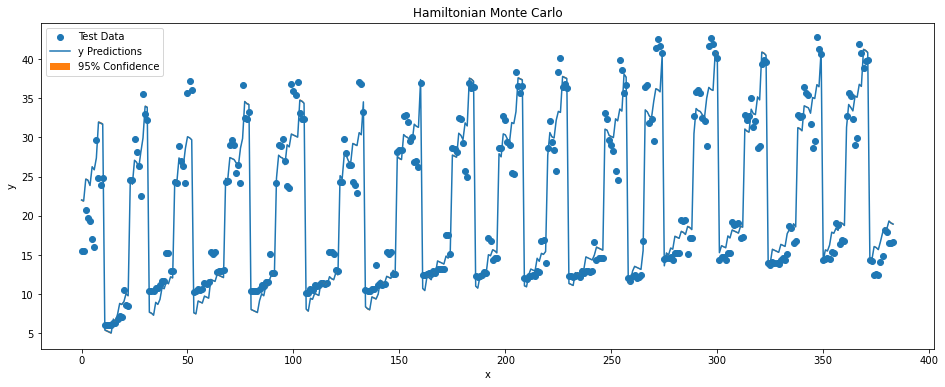

In [35]:
S_mean = np.cumsum(S, axis=0) / (np.array(range(len(S))) + 1).reshape(-1,1)
best_w = S_mean[-1,2:]

rmse_train = sqrt(mean_squared_error(y_train, (X_train @ best_w)))
rmse_test = sqrt(mean_squared_error(y_test, (X_test @ best_w)))
mae_train = mean_absolute_error(y_train, (X_train @ best_w))
mae_test = mean_absolute_error(y_test, (X_test @ best_w))


print(f"RMSE Train (HMC): {rmse_train}")
print(f"RMSE Test (HMC): {rmse_test}")
print(f"MAE Train (HMC): {mae_train}")
print(f"MAE Test (HMC): {mae_test}")
print(f"% of MAE Train (Variational Inference): {mean_absolute_percentage_error(y_train, (X_train @ best_w))}")
print(f"% of MAE Test (Variational Inference): {mean_absolute_percentage_error(y_test, (X_test @ best_w))}")


y_pred = X_test @ best_w


plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred)), 
                    y1=y_pred - 1.975 * std_pred, 
                    y2=y_pred + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Hamiltonian Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# Task 6: Gaussian Processes

###  **(3 marks)**

There's no restriction on the GP implementation, you could either use the sklearn package or the Tensorflow style, the latter of which may receive extra bonus mark depending on the quality of implementation.  

You only need to estimate the weights from $x0$ to $x8$ in this task, then calculate RMSE and plot supporting figures for your report. 

<font color=Red>  It is highly recommended that you impelment this part in a seperated file if your implementation contains too many extra libraries, as it may fool the auto-marker and incorrectly mark the rest of your notebook. 
<font>   
    
    


In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic

def error_rms(t, y):
    """Compute RMS error for a prediction vector"""
    err = np.sqrt(np.mean((y - t) ** 2))
    return err

### Gaussian Process Regressor

R Score: 0.9648203407156363
RMSE Test (gp): 1.8900458253349346
MAE Test (gp): 1.1677819263423632
% of MAE Test (gp): 0.05300587831971712
Log Marginal Liklihood: -17347.88


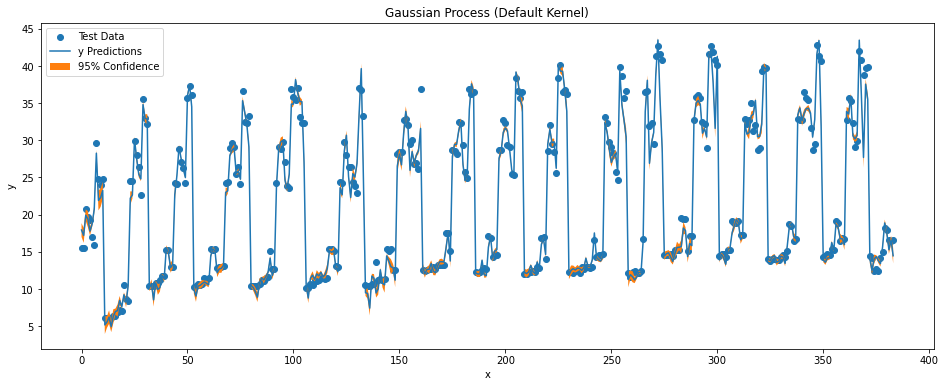

In [37]:
gpr = GaussianProcessRegressor()

gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp): {rmse_test}")
print(f"MAE Test (gp): {mae_test}")
print(f"% of MAE Test (gp): {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")


plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred)), 
                    y1=y_pred - 1.975 * std_pred, 
                    y2=y_pred + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Gaussian Process (Default Kernel)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Gaussian Process Regressor with Rational Quadratic

R Score: 0.9922288978206889
RMSE Test (gp): 0.8883167050768525
MAE Test (gp): 0.612581308443943
% of MAE Test (gp): 0.03127067613721122
Log Marginal Liklihood: -774.77


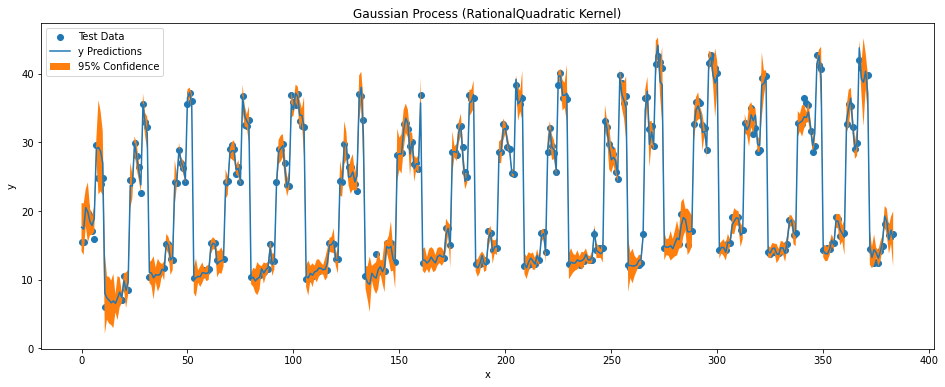

In [38]:
gpr = GaussianProcessRegressor(kernel=1.0 * RationalQuadratic(length_scale=0.5, length_scale_bounds=(1e-3, 1e2)))

gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp w/ RQ): {rmse_test}")
print(f"MAE Test (gp w/ RQ): {mae_test}")
print(f"% of MAE Test (gp w/ RQ): {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")


plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred)), 
                    y1=y_pred - 1.975 * std_pred, 
                    y2=y_pred + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Gaussian Process (Rational Quadratic Kernel)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Gaussian Process Regressor with RBF and Noise

R Score: 0.9955547194523983
RMSE Test (gp): 0.6718558562905387
MAE Test (gp): 0.502244662435542
% of MAE Test (gp): 0.02928979232142419
Log Marginal Liklihood: -729.10


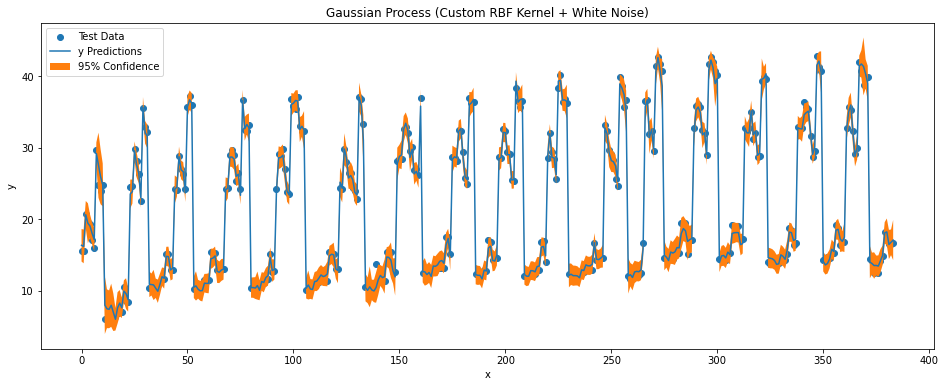

In [39]:
gpr = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-3, 1e2)) + WhiteKernel(
    noise_level=1e-4, noise_level_bounds=(1e-22, 1e2)))

gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp): {rmse_test}")
print(f"MAE Test (gp): {mae_test}")
print(f"% of MAE Test (gp): {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")

plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred)), 
                    y1=y_pred - 1.975 * std_pred, 
                    y2=y_pred + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Gaussian Process (Custom RBF Kernel + White Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [40]:
!pip3 install gpytorch
import torch
import gpytorch
from gpytorch.mlls import DeepApproximateMLL
from gpytorch.models.deep_gps import DeepGPLayer, DeepGP

In [41]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, X_train, y_train, likelihood):
        super(ExactGPModel, self).__init__(X_train, y_train, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
GP_X_train = torch.from_numpy(np.array(X_train))
GP_y_train = torch.from_numpy(np.array(y_train))
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(GP_X_train, GP_y_train, likelihood)

In [42]:
model.state_dict()

OrderedDict([('likelihood.noise_covar.raw_noise', tensor([0.])),
             ('likelihood.noise_covar.raw_noise_constraint.lower_bound',
              tensor(1.0000e-04)),
             ('likelihood.noise_covar.raw_noise_constraint.upper_bound',
              tensor(inf)),
             ('mean_module.constant', tensor([0.])),
             ('covar_module.raw_outputscale', tensor(0.)),
             ('covar_module.base_kernel.raw_lengthscale', tensor([[0.]])),
             ('covar_module.base_kernel.raw_lengthscale_constraint.lower_bound',
              tensor(0.)),
             ('covar_module.base_kernel.raw_lengthscale_constraint.upper_bound',
              tensor(inf)),
             ('covar_module.raw_outputscale_constraint.lower_bound',
              tensor(0.)),
             ('covar_module.raw_outputscale_constraint.upper_bound',
              tensor(inf))])

In [43]:
training_iter = 384

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam([
    {'params': model.parameters()},  # Includes GaussianLikelihood parameters
], lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
loss_arr = []
for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(GP_X_train)
    # Calc loss and backprop gradients
    loss = -mll(output, GP_y_train)
    loss.backward()
    loss_arr.append(loss)
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

C:\Users\justi\anaconda3\lib\site-packages\gpytorch\lazy\triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Iter 1/384 - Loss: 85.114   lengthscale: 0.693   noise: 0.693
Iter 2/384 - Loss: 68.769   lengthscale: 0.744   noise: 0.744
Iter 3/384 - Loss: 55.840   lengthscale: 0.798   noise: 0.797
Iter 4/384 - Loss: 45.709   lengthscale: 0.852   noise: 0.851
Iter 5/384 - Loss: 37.809   lengthscale: 0.907   noise: 0.904
Iter 6/384 - Loss: 31.653   lengthscale: 0.963   noise: 0.957
Iter 7/384 - Loss: 26.845   lengthscale: 1.018   noise: 1.009
Iter 8/384 - Loss: 23.071   lengthscale: 1.073   noise: 1.061
Iter 9/384 - Loss: 20.088   lengthscale: 1.126   noise: 1.110
Iter 10/384 - Loss: 17.711   lengthscale: 1.179   noise: 1.158
Iter 11/384 - Loss: 15.801   lengthscale: 1.229   noise: 1.205
Iter 12/384 - Loss: 14.251   lengthscale: 1.278   noise: 1.250
Iter 13/384 - Loss: 12.982   lengthscale: 1.325   noise: 1.294
Iter 14/384 - Loss: 11.934   lengthscale: 1.370   noise: 1.335
Iter 15/384 - Loss: 11.061   lengthscale: 1.413   noise: 1.376
Iter 16/384 - Loss: 10.327   lengthscale: 1.455   noise: 1.414
I

Iter 137/384 - Loss: 3.769   lengthscale: 2.493   noise: 3.251
Iter 138/384 - Loss: 3.762   lengthscale: 2.497   noise: 3.262
Iter 139/384 - Loss: 3.755   lengthscale: 2.500   noise: 3.272
Iter 140/384 - Loss: 3.748   lengthscale: 2.504   noise: 3.282
Iter 141/384 - Loss: 3.741   lengthscale: 2.507   noise: 3.292
Iter 142/384 - Loss: 3.735   lengthscale: 2.510   noise: 3.301
Iter 143/384 - Loss: 3.728   lengthscale: 2.514   noise: 3.311
Iter 144/384 - Loss: 3.721   lengthscale: 2.517   noise: 3.321
Iter 145/384 - Loss: 3.715   lengthscale: 2.520   noise: 3.331
Iter 146/384 - Loss: 3.709   lengthscale: 2.524   noise: 3.341
Iter 147/384 - Loss: 3.702   lengthscale: 2.527   noise: 3.351
Iter 148/384 - Loss: 3.696   lengthscale: 2.530   noise: 3.360
Iter 149/384 - Loss: 3.690   lengthscale: 2.534   noise: 3.370
Iter 150/384 - Loss: 3.683   lengthscale: 2.537   noise: 3.380
Iter 151/384 - Loss: 3.677   lengthscale: 2.540   noise: 3.389
Iter 152/384 - Loss: 3.671   lengthscale: 2.543   noise

Iter 273/384 - Loss: 3.229   lengthscale: 2.849   noise: 4.348
Iter 274/384 - Loss: 3.226   lengthscale: 2.851   noise: 4.355
Iter 275/384 - Loss: 3.224   lengthscale: 2.853   noise: 4.361
Iter 276/384 - Loss: 3.222   lengthscale: 2.855   noise: 4.367
Iter 277/384 - Loss: 3.220   lengthscale: 2.857   noise: 4.374
Iter 278/384 - Loss: 3.218   lengthscale: 2.859   noise: 4.380
Iter 279/384 - Loss: 3.216   lengthscale: 2.861   noise: 4.387
Iter 280/384 - Loss: 3.213   lengthscale: 2.863   noise: 4.393
Iter 281/384 - Loss: 3.211   lengthscale: 2.865   noise: 4.399
Iter 282/384 - Loss: 3.209   lengthscale: 2.867   noise: 4.406
Iter 283/384 - Loss: 3.207   lengthscale: 2.869   noise: 4.412
Iter 284/384 - Loss: 3.205   lengthscale: 2.871   noise: 4.418
Iter 285/384 - Loss: 3.203   lengthscale: 2.872   noise: 4.425
Iter 286/384 - Loss: 3.201   lengthscale: 2.874   noise: 4.431
Iter 287/384 - Loss: 3.199   lengthscale: 2.876   noise: 4.437
Iter 288/384 - Loss: 3.197   lengthscale: 2.878   noise

In [44]:
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    GP_X_test = torch.from_numpy(np.array(X_test))
    observed_pred = likelihood(model(GP_X_test))

MAE Test: 1.8414558537675425
RMSE Test: 2.5818956015450696
% of MAE Test: 0.08586379468967581


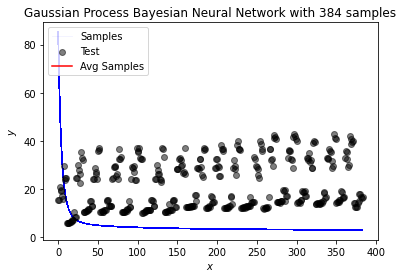

In [45]:
samples = []
with torch.no_grad():
    # Initialize plot
    for i in range(training_iter):
      plt.plot(range(384),
        loss_arr,
        'b',
        linewidth=0.9,
        alpha=0.05,
        zorder=1,
        label='Samples' if i == 0 else None)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x=range(384), y=y_test, c='k', label='Test', zorder=2, alpha=0.5)
    plt.plot(np.array(loss_arr).mean(axis=0), label='Avg Samples', color='r', zorder=3)
    # plt.plot(model.predict(X_test), label='Single Prediction', color='g', zorder=4)

    mae_err = mean_absolute_error(y_test, observed_pred.mean.numpy())
    rmse_err = error_rms(y_test, observed_pred.mean.numpy())
    print(f'MAE Test: {mae_err}')
    print(f'RMSE Test: {rmse_err}')
    print(f"% of MAE Test: {mean_absolute_percentage_error(y_test, observed_pred.mean.numpy())}")
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper left')
    plt.title(f'Gaussian Process Bayesian Neural Network with {training_iter} samples')